<a href="https://colab.research.google.com/github/eventia/mnistcode/blob/master/aicode11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고등학교 수학과 파이썬으로 배우는 인공지능 소스코드  **Ch 11**

In [0]:
# 11.2. 수치미분 1

def ndiff(f,x):
    h = 1e-5
    return (f(x+h)-f(x-h))/(2*h)

def funcx2(x):
    return x**2 + 2*x + 1

x = 15
y = funcx2(15)
fp = ndiff(funcx2, x)
print(x, y, fp)


15 256 32.000000001630724


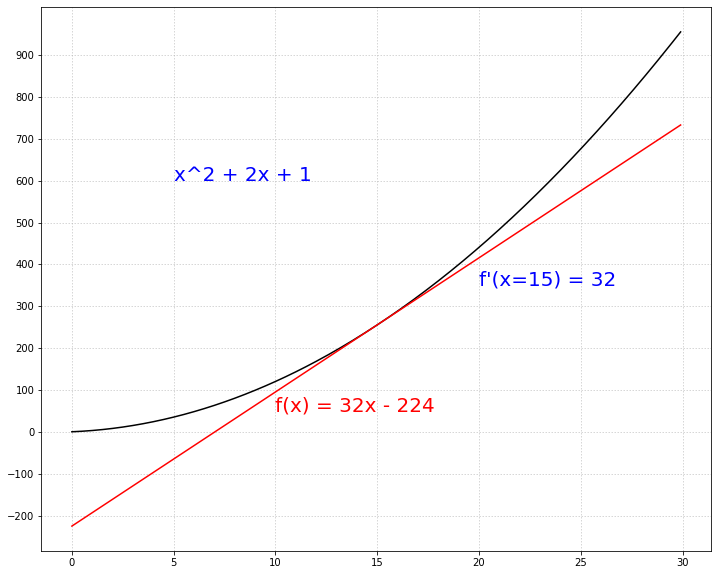

In [0]:
# 11.2. 수치미분 2

import numpy as np 
import matplotlib.pyplot as plt

x0 = 15
y0 = funcx2(x0)
grad = ndiff(funcx2, x0)
# print(x0, y0, grad)

x = np.arange(0.00, 30.0, 0.1)
y = funcx2(x)
y1 = grad*(x-x0)+y0

plt.figure(figsize=(12,10))
plt.yticks(np.arange(-200, 1000, 100))
plt.xticks(np.arange(0,301, 5))
plt.grid(dashes=(3,3),linewidth=0.5)

plt.text(5, 600, 'x^2 + 2x + 1', color='blue', fontsize=20)
plt.text(20, 350, 'f\'(x=15) = 32', color='blue', fontsize=20)
plt.text(10, 50, 'f(x) = 32x - 224 ', color='red', fontsize=20)

plt.plot(x,y, 'k-')
plt.plot(x,y1, 'r-')

plt.show()



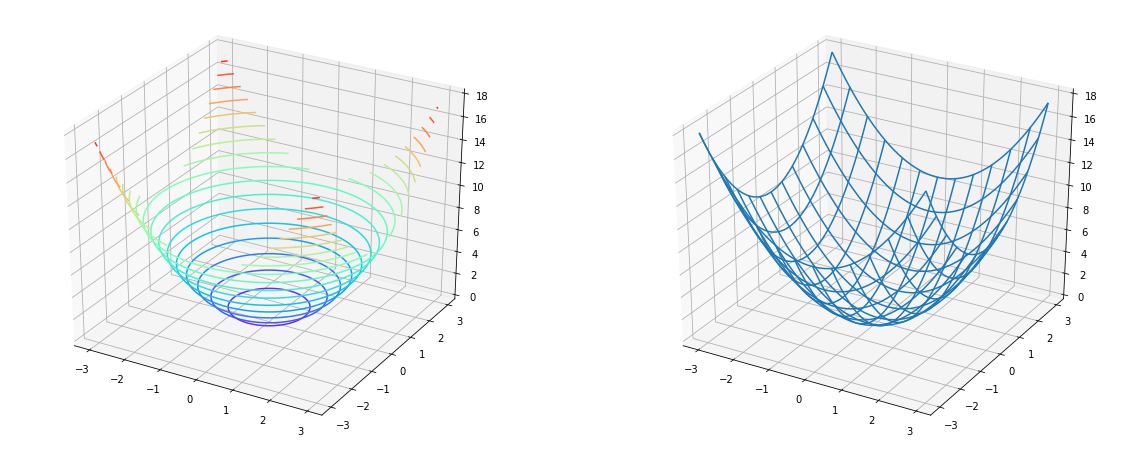

In [0]:
# 11.5. 2차원 함수의 그래프와 편미분

# 편미분
# f(x0,x1) = x0**2 + x1**2

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def function_2(x):
  return x[0]**2 + x[1]**2

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')

X = np.arange(-3.0, 3.0, 0.05)
Y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

ax.contour3D(X, Y, Z, 20, cmap=plt.cm.rainbow)
ax = fig.add_subplot(122, projection='3d')

# Grab some test data.
X = np.arange(-3.0, 3.0, 0.05)
Y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


In [0]:
# 11.6. 편미분 프로그래밍 코드

h = 1e-5

def function_rx(x, y):
    return x**2 + y**2

def ndiff2(f, x, y):
    rf_rx = (f(x+h, y)-f(x-h, y))/(2*h)
    rf_ry = (f(x, y+h)-f(x, y-h))/(2*h)
    return [rf_rx, rf_ry]

ndiff2(function_rx, 1, 3)


[2.0000000000131024, 6.000000000039306]

In [0]:
# 11.7	np.nditer 1

import numpy as np

market = np.array([['apple', 'strawberry', 'grape'], 
                   ['water', 'cola', 'orangejuice']])

it = np.nditer(market, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index
    print(market[idx])
    
    it.iternext()


apple
strawberry
grape
water
cola
orangejuice


In [0]:
# 11.7	np.nditer 2

import numpy as np

it = np.nditer(market, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    print(market[it.multi_index])
    it.iternext()


apple
strawberry
grape
water
cola
orangejuice


In [0]:
# 11.10. nditer 편미분 코드 1

import numpy as np

def numerical_diff(f, x):
    h = 1e-4    # 0.0001
    nd_coef = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        index = it.multi_index
        tmp = x[index]
        x[index] = tmp + h
        fxh2 = f()    # f(x+h)
        x[index] = tmp - h 
        fxh1 = f()    # f(x-h)
        nd_coef[index] = (fxh2 - fxh1) / (2*h)
        x[index] = tmp 
        it.iternext()
        
    return nd_coef


w0 = np.array([[.1,.2,.3],
               [.2,.4,.6]])

def func():
    y = 2*w0[0,0]-3*w0[0,1]+4*w0[0,2]-5*w0[1,0]+6*w0[1,1]-7*w0[1,2]+8 
    # 기울기는 앞에서부터 순서대로 2,-3,4,-5,6,-7
    return y

a = numerical_diff(func, w0)
print(a)


[[ 2. -3.  4.]
 [-5.  6. -7.]]


x = [-1.23071955e-04  8.20479703e-05]


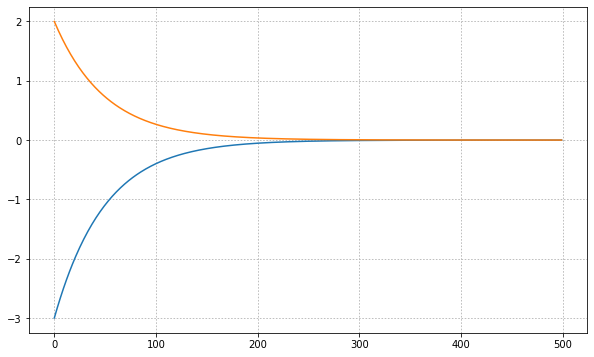

In [0]:
# 11.11. 경사하강법

import numpy as np 
import matplotlib.pyplot as plt

def numerical_diff(f, x):
    h = 1e-4    # 0.0001
    nd_coef = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        index = it.multi_index
        tmp = x[index]
        x[index] = tmp + h
        fxh2 = f()    # f(x+h)
        x[index] = tmp - h 
        fxh1 = f()    # f(x-h)
        nd_coef[index] = (fxh2 - fxh1) / (2*h)
        x[index] = tmp 
        it.iternext()

    return nd_coef

def func():
    return x[0]**2 + x[1]**2

# 네트워크 변수 x의 초기값과 학습률 lr 입력
(x, lr, iter_num) = np.array([-3.0, 2.0]), 0.01, 500
Y1, Y2 = [],[]

for i in range(iter_num):
    # print('step ={:4d}'.format(i), ',  x =',x)
    Y1.append(x[0])
    Y2.append(x[1])
    grad = numerical_diff(func, x)
    x -= lr * grad

# 네트워크 변수 x 의 학습 후 결과값 
print('x =', x)

X = np.arange(0, len(Y1), 1)

plt.figure(figsize=(10,6))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.grid(dashes=(2,2))

plt.show()


